In [1]:
import scanpy as sc
import os
import math
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.rc('font',family='Times New Roman')
my_colors = ["#1EB2A6","#ffc4a3","#e2979c","#F67575"]

In [2]:
sc.settings.verbosity = 3  # 输出提示信息         
# ?sc.settings.verbosity
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')# 设置输出图像格式
results_file = 'C:\\Users\\yubg\\Desktop\\pbmc3k.h5ad'  # 存储分析结果
'''scanpy==1.10.4 anndata==0.11.3 umap==0.5.7 numpy==1.24.3 scipy==1.11.1 pandas==2.0.3 
scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.11.8 pynndescent==0.5.13
'''


scanpy==1.10.4 anndata==0.11.3 umap==0.5.7 numpy==1.24.3 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.11.8 pynndescent==0.5.13


In [4]:
# 这个是第一种读取方法
adata = sc.read_10x_mtx(
    r'D:\OneDrive\出版\2025卫生出版社\hhr',  
    var_names='gene_symbols',                
    cache=True) 
adata.var_names_make_unique()
adata

... reading from cache file cache\D-OneDrive-出版-2025卫生出版社-hhr-matrix.h5ad


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

df = pd.read_csv('S01_datafinal.csv',index_col=0).T  
cellinfo = pd.DataFrame(df.index,index=df.index,columns=['sample_index'])  
geneinfo = pd.DataFrame(df.columns,index=df.columns,columns=['genes_index'])  
adata = sc.AnnData(df, obs=cellinfo, var = geneinfo)  
adata

pytho和R语言有点不同，通常情况下，行为样本， 列为特征


In [4]:
print(f"adata.obs.shape:{adata.obs.shape}\n") # ?个细胞
print(f"adata.var.shape:{adata.var.shape}") # ?个基因
print(f"adata.to_df().shape:{adata.to_df().shape}")

adata.obs.shape:(2700, 0)

adata.var.shape:(32738, 1)
adata.to_df().shape:(2700, 32738)


In [6]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1, AAACGCACTGGTAC-1, AAACGCTGACCAGT-1, AAACGCTGGTTCTT-1, AAACGCTGTAGCCA-1, AAACGCTGTTTCTG-1, AAACTTGAAAAACG-1, AAACTTGATCCAGA-1, AAAGAGACGAGATA-1, AAAGAGACGCGAGA-1, AAAGAGACGGACTT-1, AAAGAGACGGCATT-1, AAAGATCTGGGCAA-1, AAAGCAGAAGCCAT-1, AAAGCAGATATCGG-1, AAAGCCTGTATGCG-1, AAAGGCCTGTCTAG-1, AAAGTTTGATCACG-1, AAAGTTTGGGGTGA-1, AAAGTTTGTAGAGA-1, AAAGTTTGTAGCGT-1, AAATCAACAATGCC-1, AAATCAACACCAGT-1, AAATCAACCAGGAG-1, AAATCAACCCTATT-1, AAATCAACGGAAGC-1, AAATCAACTCGCAA-1, AAATCATGACCACA-1, AAATCCCTCCACAA-1, AAATCCCTGCTATG-1, AAATGTTGAACGAA-1, AAATGTTGCCACAA-1, AAATGTTGTGGCAT-1, AAATTCGAAGGTTC-1, AAATTCGAATCACG-1, AAATTCGAGCTGAT-1, AAATTCGAGGAGTG-1, AAATTCGATTCTCA-1, AAATTGACACGACT-1, AAATTGACTCGCTC-1, AACAAACTCATTTC-1, AACAAACTTTCGTT-1, AACAATACGACGAG-1, AACACGTGCAGAGG-1, AACACGTGGAAAGT-1, AACACGTGGAACCT-1, AACACGTGGCTACA-1, AACACGTGTACGAC-1, AACAGCACAAGAGT-1, AACATTGATGGGAG-1, AACCAGTGATACCG-1, AACCCAGATCGCTC-1, AACCGATGCTCCCA-1, AACCGATGGTCATG-1, AACCGATGTTCTAC-1, AACCGCCTAGCGTT-1, AACCGCCTCTACGA-1, AACCTACTGTGAGG-1, AACCTACTGTGTTG-1, AACCTTACGAGACG-1, AACCTTACGCGAGA-1, AACCTTACTAACGC-1, AACCTTTGGACGGA-1, AACCTTTGTACGCA-1, AACGCAACAAGTAG-1, AACGCATGACCCAA-1, AACGCATGCCTTCG-1, AACGCATGTACTTC-1, AACGCCCTCGGGAA-1, AACGCCCTCGTACA-1, AACGCCCTGCTTAG-1, AACGCCCTGGCATT-1, AACGTCGAGTATCG-1, AACGTGTGAAAGCA-1, AACGTGTGGCGGAA-1, AACGTGTGTCCAAG-1, AACGTGTGTGCTTT-1, AACTACCTTAGAGA-1, AACTCACTCAAGCT-1, AACTCACTTGGAGG-1, AACTCGGAAAGTGA-1, AACTCGGAAGGTCT-1, AACTCTTGCAGGAG-1, AACTGTCTCCCTTG-1, AACTTGCTACGCTA-1, AACTTGCTGGGACA-1, AAGAACGAGTGTTG-1, AAGAAGACGTAGGG-1, AAGACAGAAGTCTG-1, AAGACAGAGGATCT-1, AAGACAGATTACCT-1, AAGAGATGGGTAGG-1, AAGATGGAAAACAG-1, AAGATGGAGAACTC-1, AAGATGGAGATAAG-1, AAGATTACAACCTG-1, ...]

[2700 rows x 0 columns]

In [7]:
print(f"adata.var:{adata.var}\n")

adata.var:                     gene_ids
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
AC145205.1    ENSG00000215635
BAGE5         ENSG00000268590
CU459201.1    ENSG00000251180
AC002321.2    ENSG00000215616
AC002321.1    ENSG00000215611

[32738 rows x 1 columns]



In [8]:
adata.to_df().iloc[0:5,0:5]

MIR1302-10  FAM138A  OR4F5  RP11-34P13.7  RP11-34P13.8
AAACATACAACCAC-1         0.0      0.0    0.0           0.0           0.0
AAACATTGAGCTAC-1         0.0      0.0    0.0           0.0           0.0
AAACATTGATCAGC-1         0.0      0.0    0.0           0.0           0.0
AAACCGTGCTTCCG-1         0.0      0.0    0.0           0.0           0.0
AAACCGTGTATGCG-1         0.0      0.0    0.0           0.0           0.0

In [9]:
np.where(adata.to_df()>0)

(array([   0,    0,    0, ..., 2699, 2699, 2699], dtype=int64),
 array([   70,   166,   178, ..., 32702, 32705, 32708], dtype=int64))

In [10]:
adata.to_df().iloc[0,70]

1.0

### 数据预处理

这里介绍一下scanpy中常用的组件

pp: 数据预处理   
tl: 添加额外信息   
pl：可视化  

In [11]:
#统计基因在细胞中的占比并可视化
sc.pl.highest_expr_genes(adata, n_top=20)  # 可视化在所有细胞中平均表达量最高的前20个基因的函数。每一个基因在所有细胞中的平均表达量（这里计算了百分比含量）
sc.pp.filter_cells(adata, min_genes=200)   # 用于过滤细胞的函数。表示只保留至少表达 200 个基因的细胞
sc.pp.filter_genes(adata, min_cells=3)     # 用于过滤基因的函数。表示只保留至少在 3 个细胞中表达的基因


normalizing counts per cell
    finished (0:00:00)


filtered out 19024 genes that are detected in less than 3 cells


In [12]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['mt'].head()


AL627309.1       False
AP006222.2       False
RP11-206L10.2    False
RP11-206L10.9    False
LINC00115        False
Name: mt, dtype: bool

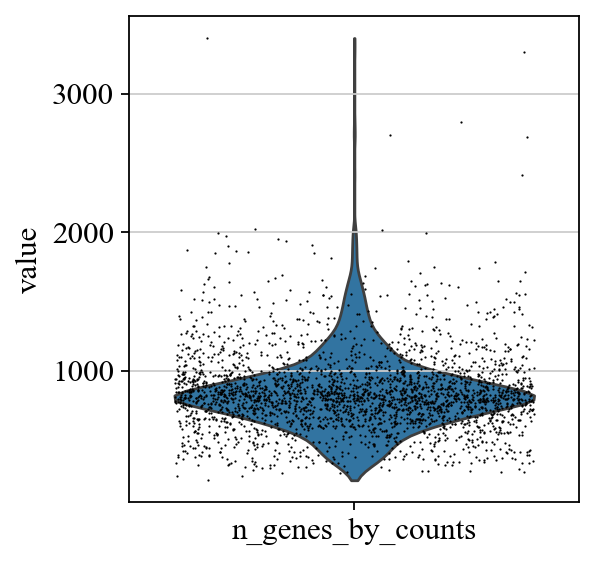

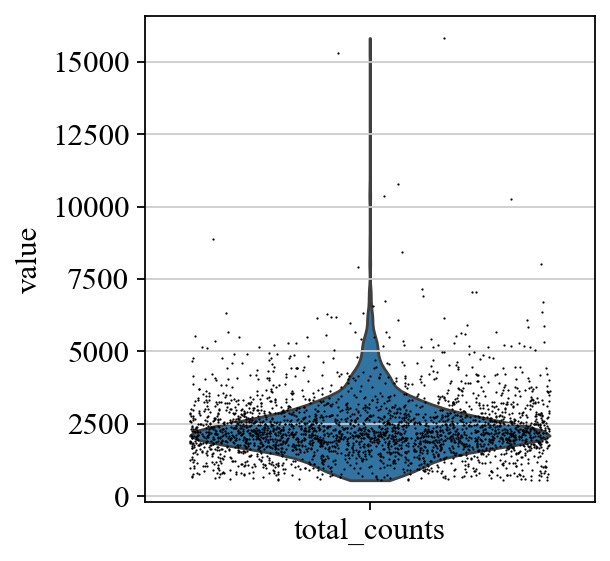

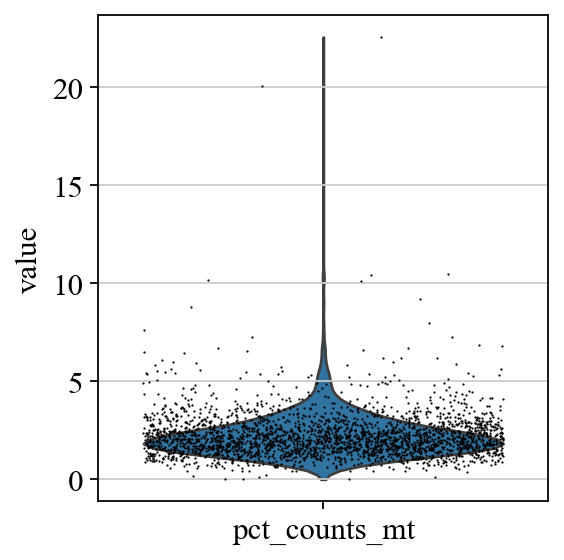

In [13]:
# 抽取带有MT的字符串
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# 数据过滤
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# 过滤后可视化（官方文档真的骚到我头皮发麻）
sc.pl.violin(adata, ['n_genes_by_counts'],jitter=0.4)
sc.pl.violin(adata, ['total_counts'],jitter=0.4)
sc.pl.violin(adata, ['pct_counts_mt'],jitter=0.4)


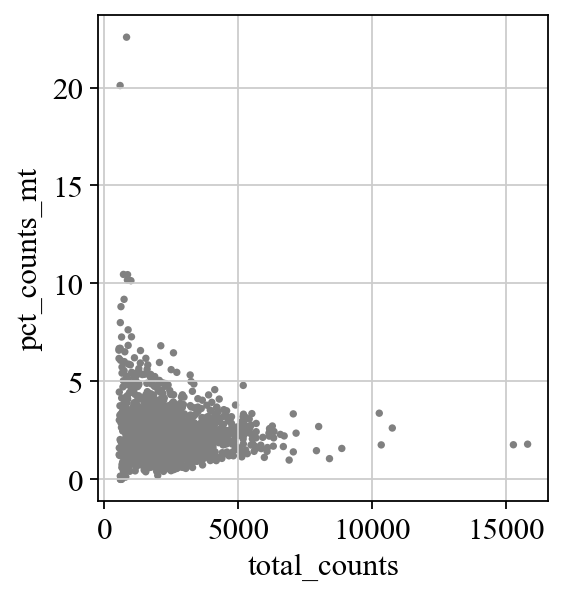

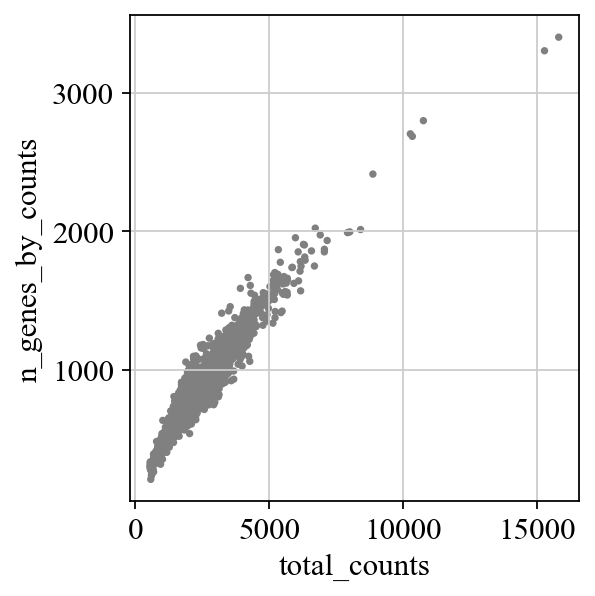

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [15]:
# 提取线粒体dna在5%以下
adata = adata[adata.obs.pct_counts_mt < 5, :]
# 提取基因不超过2500的细胞
adata = adata[adata.obs.n_genes_by_counts < 2500, :]


### 标准流程：

**log :** NormalizeData  
**找特征 :** FindVariableFeatures  
**标准化 :** ScaleData  
**pca :** RunPCA  
**构建图 :** FindNeighbors  
**聚类 :** FindClusters  
**tsne /umap :** RunTSNE RunUMAP  
**差异基因 :** FindAllMarkers / FindMarkers  

In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)  # 不对每个细胞的基因表达值进行总计数标准化，使每个细胞的表达值总和达到指定的目标值。
sc.pp.log1p(adata)  #对标准化后的基因表达值进行对数变换，通常使用自然对数。

normalizing counts per cell
    finished (0:00:00)


In [21]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)#对单细胞转录组数据进行高变基因识别的操作。主要功能就是从单细胞转录组数据中识别出这些高变基因，以便后续的分析，如细胞聚类、差异表达分析等。


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


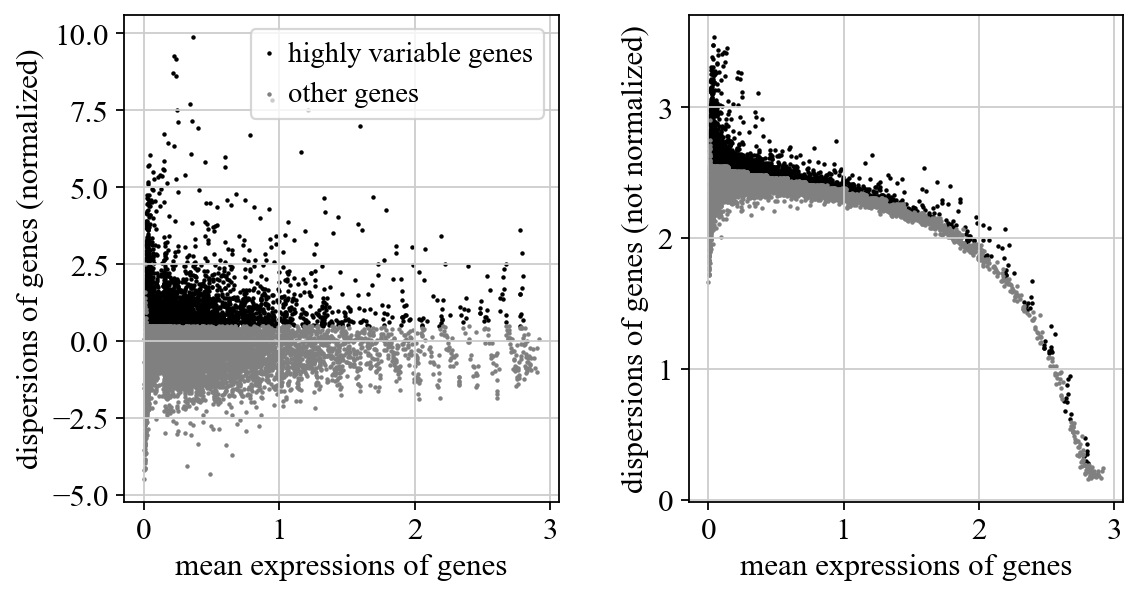

In [22]:
# 可视化
sc.pl.highly_variable_genes(adata)

# 保存一下原始数据
adata.raw = adata

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:14)
computing PCA
    with n_comps=50
    finished (0:00:04)


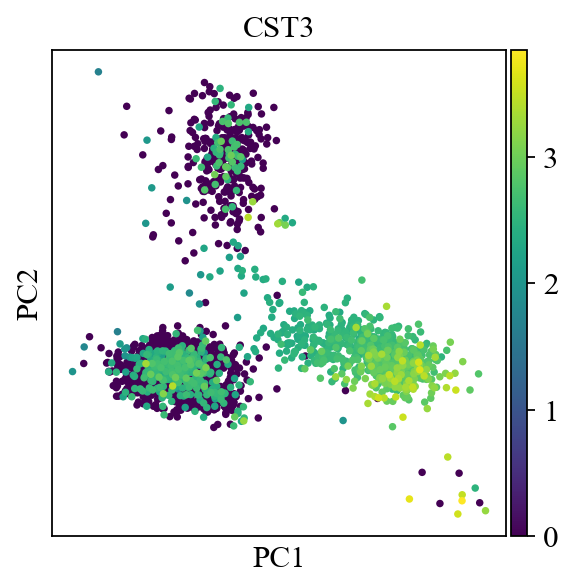

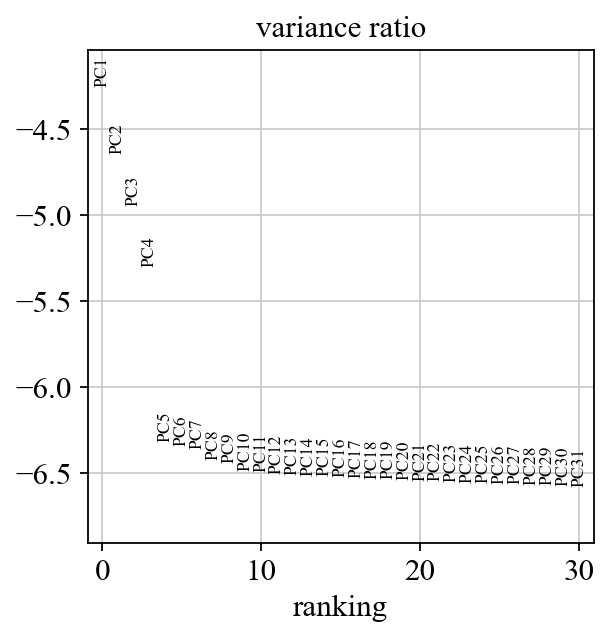

In [23]:
# 提取高变基因
adata = adata[:, adata.var.highly_variable]
# 过滤掉没用的东西
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
# 中心化
sc.pp.scale(adata, max_value=10)
# pca
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')
sc.pl.pca_variance_ratio(adata, log=True)
# 输出结果
adata.write(results_file)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


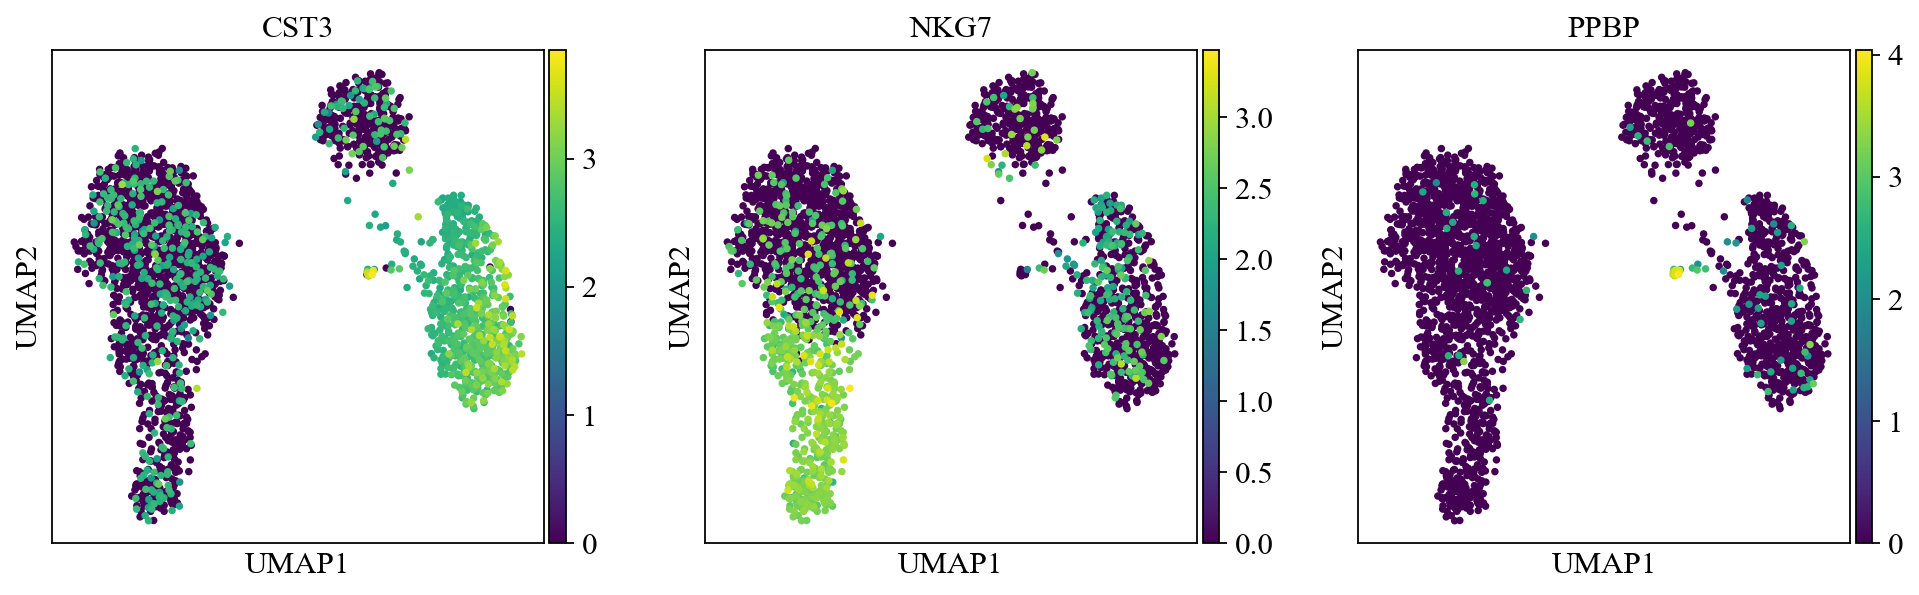

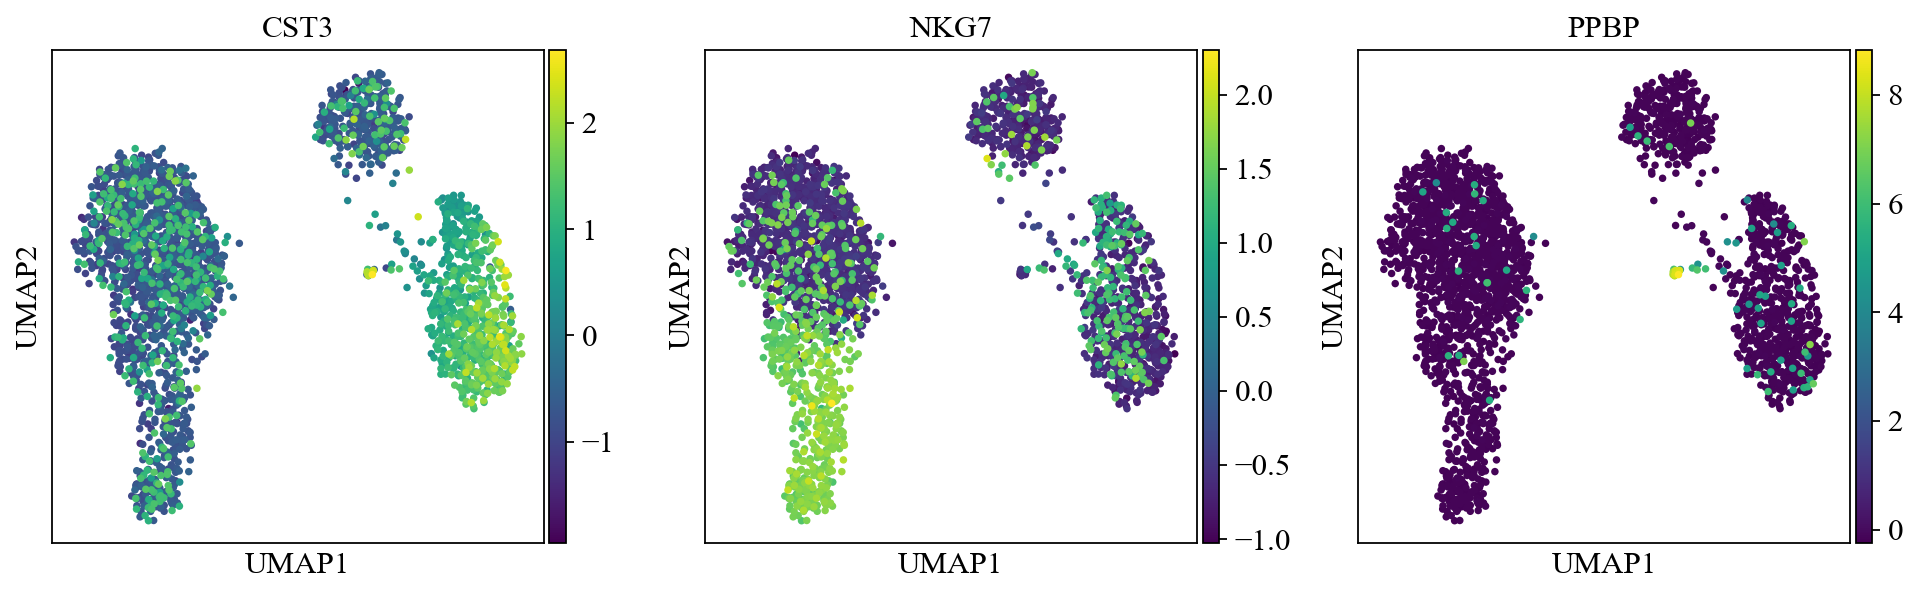

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:15)


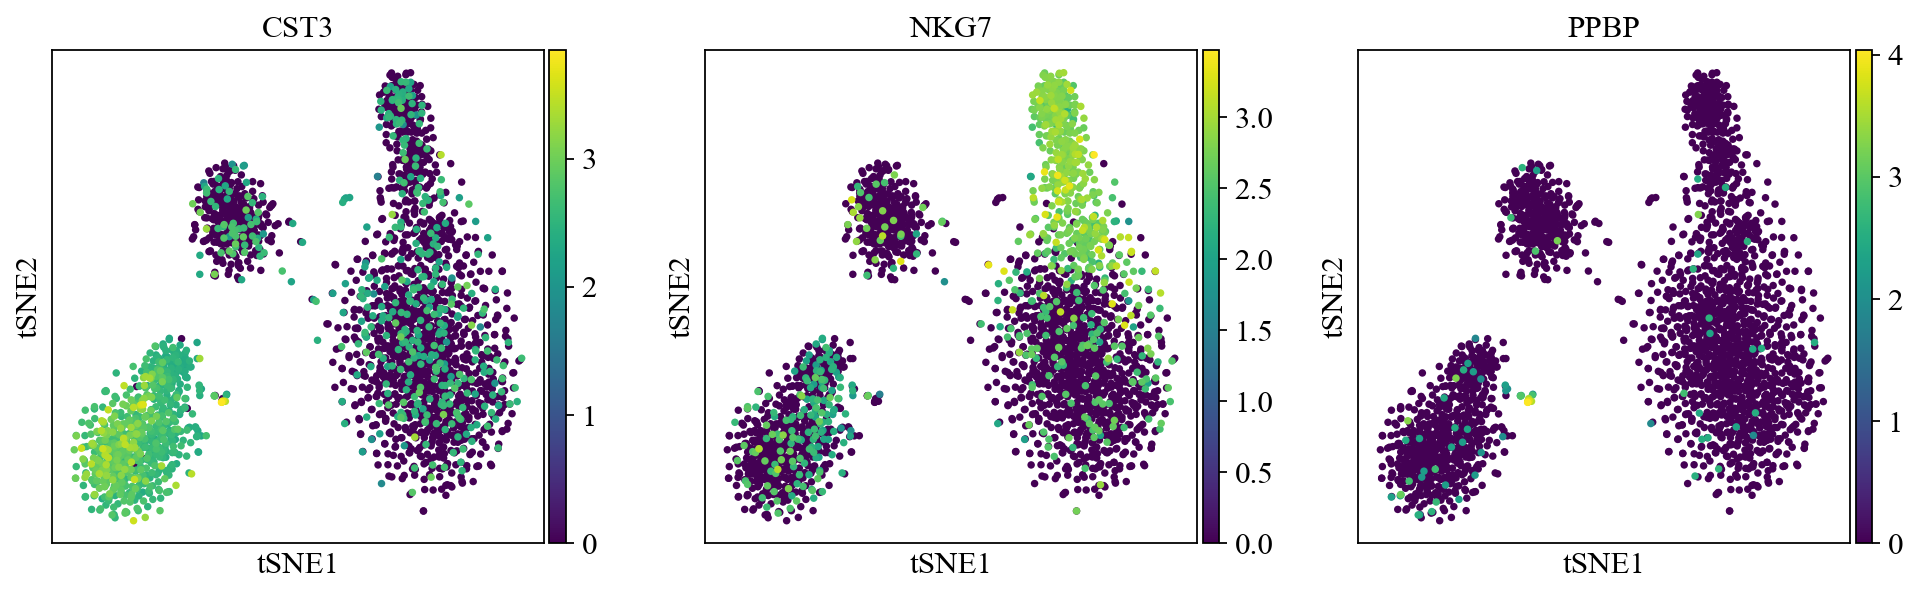

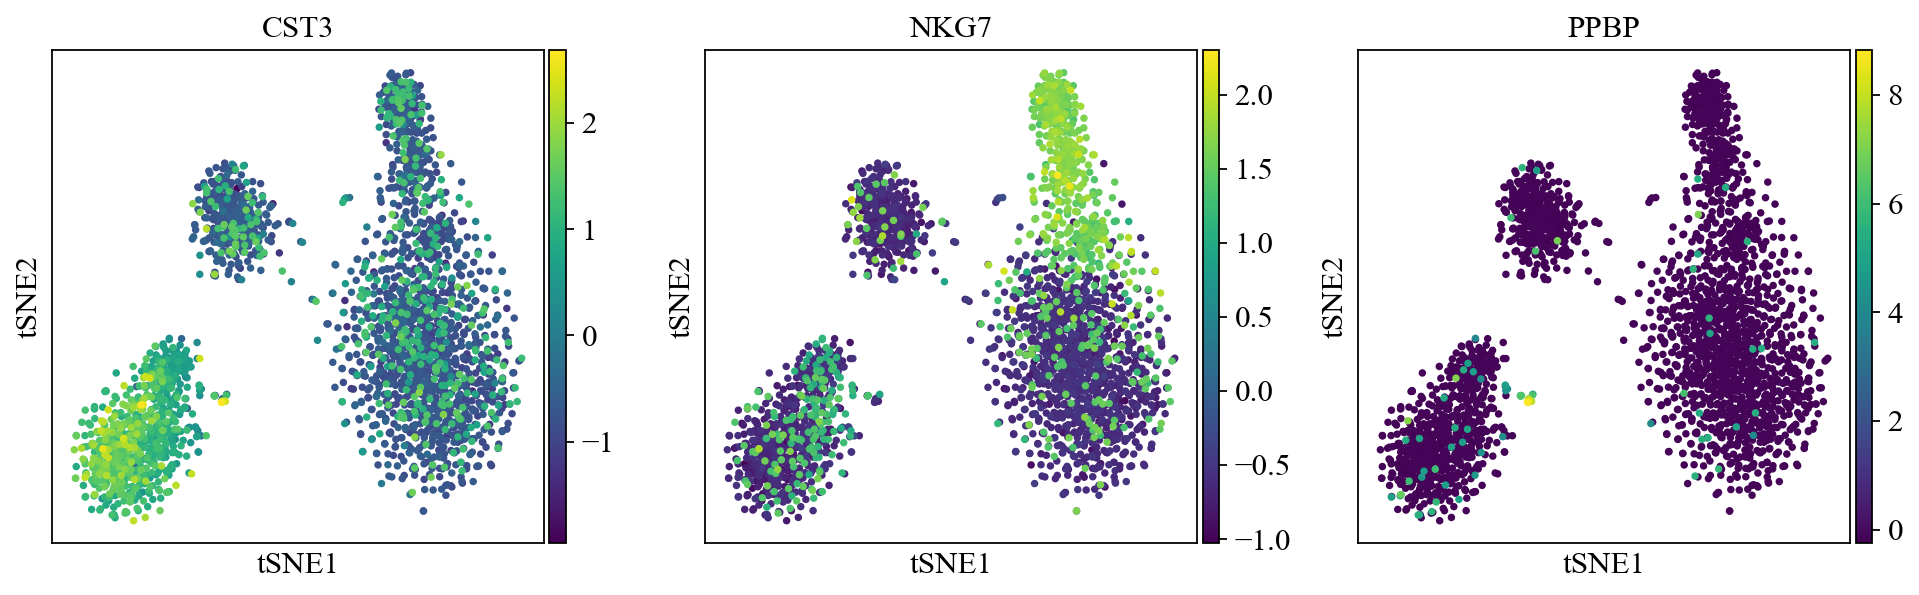

In [24]:
# 构建图
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

sc.tl.tsne(adata)
sc.pl.tsne(adata, color=['CST3', 'NKG7', 'PPBP'])
sc.pl.tsne(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


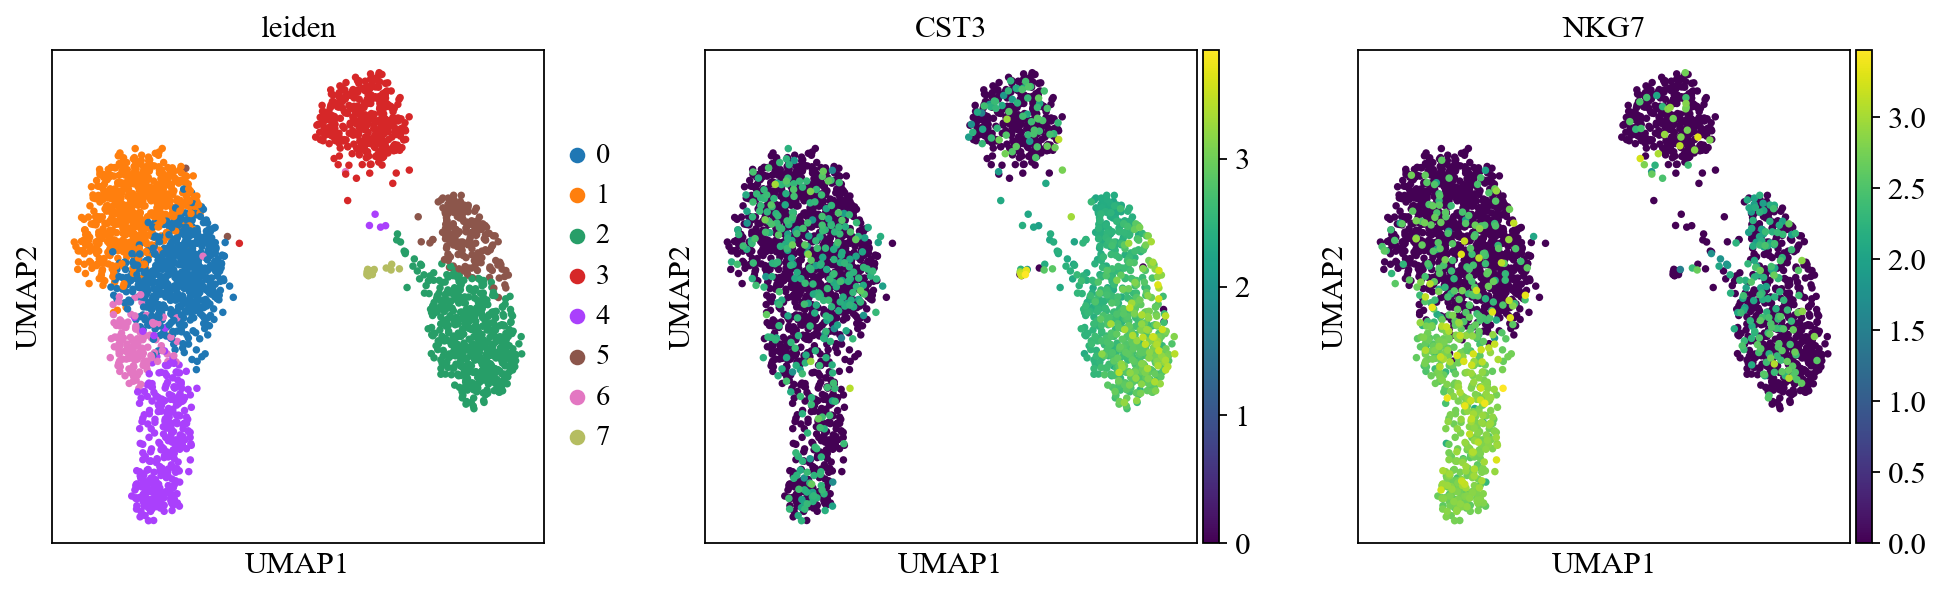

In [27]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])
sc.pl.tsne(adata, color=['leiden', 'CST3', 'NKG7'])
# 保存结果
adata.write(results_file)


In [28]:
# 这里使用秩和检验
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


In [29]:
num = 2 # 通过这个控制marker基因的数量 
marker_genes = list(set(np.array(pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(num)).reshape(-1)))
len(marker_genes)

15

In [30]:
# 看一下每一个组的特征基因
#adata = sc.read(results_file) 
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).iloc[0:6,0:6]



0_n           0_p     1_n            1_p     2_n            2_p
0  IL32  5.317018e-86    LDHB  1.730695e-102  S100A9  2.295686e-208
1  CD3D  2.287839e-57    CD3D   7.584004e-80  S100A8  3.104040e-204
2  IL7R  3.082698e-46    CCR7   2.419342e-63  LGALS2  1.640907e-199
3  CD3E  2.639155e-40    CD3E   6.554239e-59    CST3  4.373738e-198
4   LTB  4.900873e-37    NPM1   1.596829e-52    FCN1  1.064054e-192
5  LDHB  2.426923e-31  TMEM66   3.781697e-50  TYROBP  1.678676e-189

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


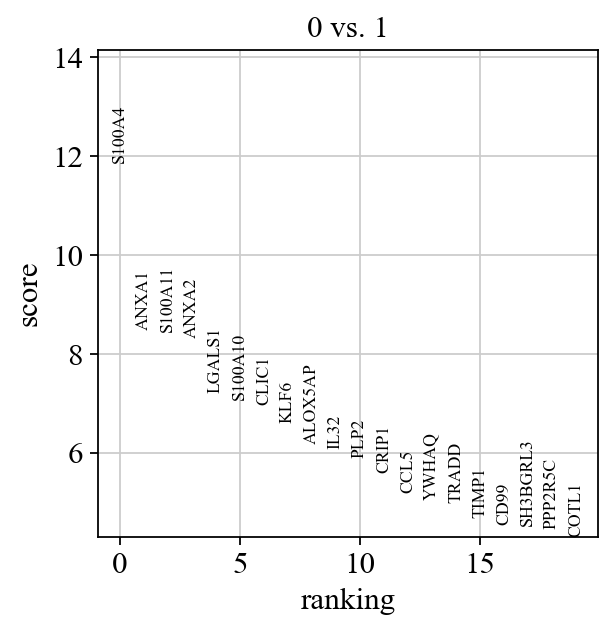

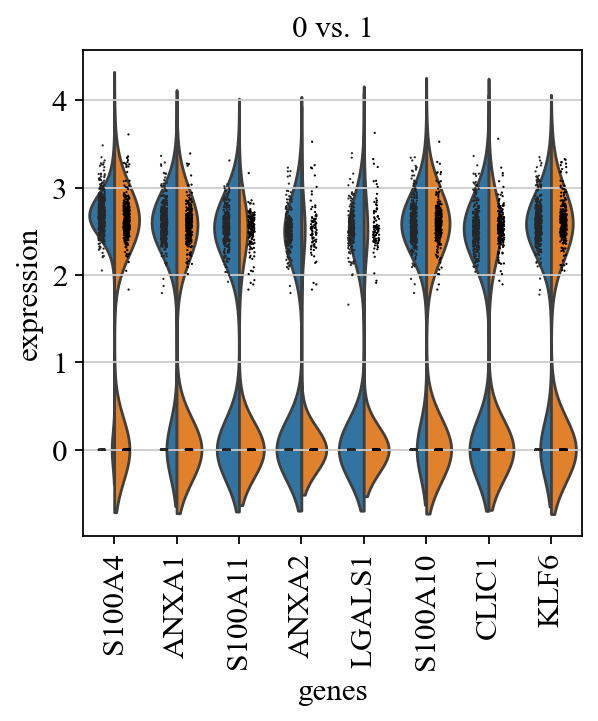

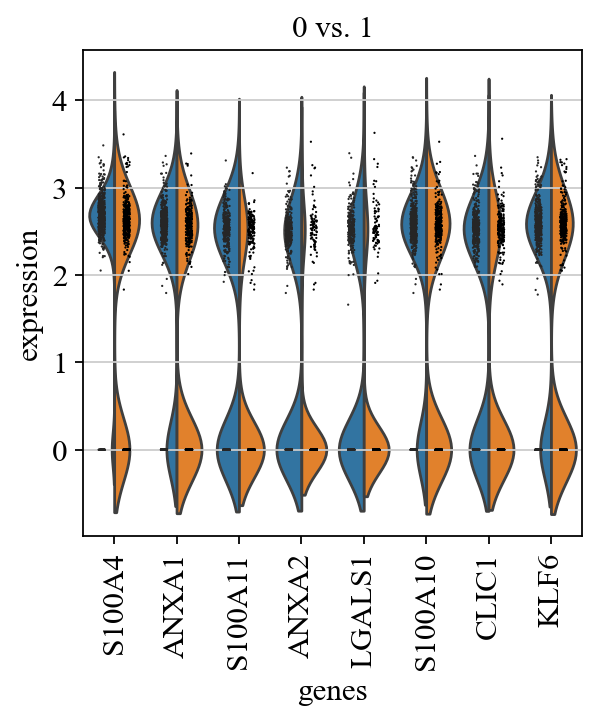

In [31]:
# 比较组别间差异
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)
# 这里需要重载一下结果，如果不重载的话结果会有差异的
#adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)



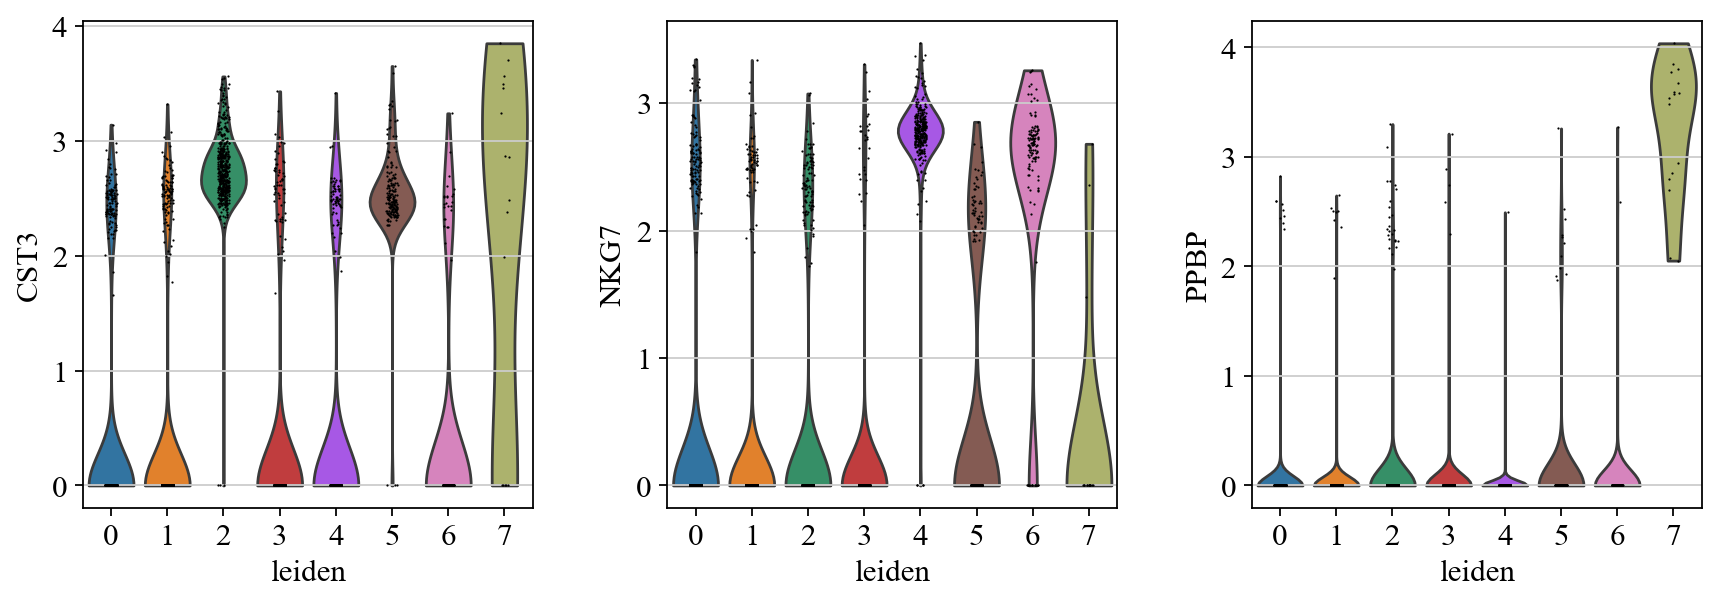

In [32]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')


Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


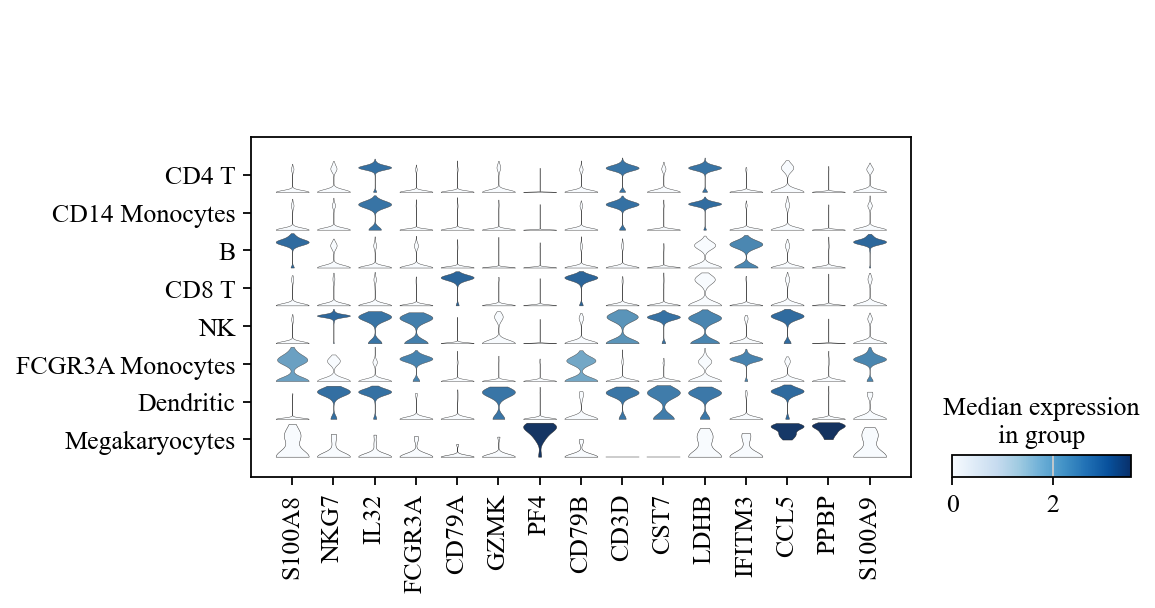

In [44]:
new_cluster_names = ['CD4 T', 'CD14 Monocytes', 'B', 'CD8 T', 'NK', 'FCGR3A Monocytes', 'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')
sc.pl.dotplot(adata, marker_genes, groupby='leiden');
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden');#, rotation=90
adata.raw.to_adata().write('C:\\Users\\yubg\\Desktop\\pbmc3k_withoutX.h5ad')



### 实例

Celltypist自动细胞类型注释工具，该工具能够非常精细地注释各种免疫细胞亚群。

In [36]:
import scanpy as sc
import celltypist
from celltypist import models

In [37]:
models.download_models(force_update = True)  #下载预训练模型
models.models_path  #安装文件存放路径

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in C:\Users\yubg\.celltypist\data\models
💾 Downloading model [1/54]: Immune_All_Low.pkl
💾 Downloading model [2/54]: Immune_All_High.pkl
💾 Downloading model [3/54]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/54]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/54]: Adult_Human_MTG.pkl
💾 Downloading model [6/54]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/54]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/54]: Adult_Human_Skin.pkl
💾 Downloading model [9/54]: Adult_Human_Vascular.pkl
💾 Downloading model [10/54]: Adult_Mouse_Gut.pkl
💾 Downloading model [11/54]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [12/54]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [13/54]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [14/54]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [15/54]: COVID19_HumanChallenge_Blood

'C:\\Users\\yubg\\.celltypist\\data\\models'

In [38]:
models.models_description()  #模型描述

👉 Detailed model information can be found at `https://www.celltypist.org/models`


model  \
0                        Immune_All_Low.pkl   
1                       Immune_All_High.pkl   
2                    Adult_COVID19_PBMC.pkl   
3   Adult_CynomolgusMacaque_Hippocampus.pkl   
4                       Adult_Human_MTG.pkl   
5           Adult_Human_PancreaticIslet.pkl   
6          Adult_Human_PrefrontalCortex.pkl   
7                      Adult_Human_Skin.pkl   
8                  Adult_Human_Vascular.pkl   
9                       Adult_Mouse_Gut.pkl   
10            Adult_Mouse_OlfactoryBulb.pkl   
11                Adult_Pig_Hippocampus.pkl   
12      Adult_RhesusMacaque_Hippocampus.pkl   
13                 Autopsy_COVID19_Lung.pkl   
14         COVID19_HumanChallenge_Blood.pkl   
15             COVID19_Immune_Landscape.pkl   
16                   Cells_Adult_Breast.pkl   
17                     Cells_Fetal_Lung.pkl   
18                   Cells_Human_Tonsil.pkl   
19               Cells_Intestinal_Tract.pkl   
20                    Cells_Lung_Airway.pkl   
21               Developing_Human_Brain.pkl   
22              Developing_Human_Gonads.pkl   
23         Developing_Human_Hippocampus.pkl   
24              Developing_Human_Organs.pkl   
25              Developing_Human_Thymus.pkl   
26               Developing_Mouse_Brain.pkl   
27         Developing_Mouse_Hippocampus.pkl   
28            Fetal_Human_AdrenalGlands.pkl   
29                 Fetal_Human_Pancreas.pkl   
30                Fetal_Human_Pituitary.pkl   
31                   Fetal_Human_Retina.pkl   
32                     Fetal_Human_Skin.pkl   
33                  Healthy_Adult_Heart.pkl   
34                 Healthy_COVID19_PBMC.pkl   
35                  Healthy_Human_Liver.pkl   
36                  Healthy_Mouse_Liver.pkl   
37          Human_AdultAged_Hippocampus.pkl   
38              Human_Colorectal_Cancer.pkl   
39           Human_Developmental_Retina.pkl   
40              Human_Embryonic_YolkSac.pkl   
41              Human_Endometrium_Atlas.pkl   
42                       Human_IPF_Lung.pkl   
43       Human_Longitudinal_Hippocampus.pkl   
44                     Human_Lung_Atlas.pkl   
45                        Human_PF_Lung.pkl   
46               Human_Placenta_Decidua.pkl   
47                  Lethal_COVID19_Lung.pkl   
48                  Mouse_Dentate_Gyrus.pkl   
49          Mouse_Isocortex_Hippocampus.pkl   
50         Mouse_Postnatal_DentateGyrus.pkl   
51                    Mouse_Whole_Brain.pkl   
52                   Nuclei_Lung_Airway.pkl   
53                      Pan_Fetal_Human.pkl   

                                          description  
0   immune sub-populations combined from 20 tissue...  
1   immune populations combined from 20 tissues of...  
2   peripheral blood mononuclear cell types from C...  
3   cell types from the hippocampus of adult cynom...  
4   cell types and subtypes (10x-based) from the a...  
5   cell types from pancreatic islets of healthy a...  
6   cell types and subtypes from the adult human d...  
7            cell types from human healthy adult skin  
8   vascular populations combined from multiple ad...  
9   cell types in the adult mouse gut combined fro...  
10   cell types from the olfactory bulb of adult mice  
11          cell types from the adult pig hippocampus  
12  cell types from the hippocampus of adult rhesu...  
13  cell types from the lungs of 16 SARS-CoV-2 inf...  
14  detailed blood cell states from 16 individuals...  
15  immune subtypes from lung and blood of COVID-1...  
16             cell types from the adult human breast  
17    cell types from human embryonic and fetal lungs  
18      tonsillar cell types from humans (3-65 years)  
19  intestinal cells from fetal, pediatric (health...  
20  cell populations from scRNA-seq of five locati...  
21  cell types from the first-trimester developing...  
22  cell types of human gonadal and adjacent extra...  
23   cell types from the developing human hippocampus  
24  cell types of five endoderm-derived organs in ..

Immune_All_High和 Immune_All_Low分别是 32 个免疫细胞大群和 90 个免疫细胞精细亚群的预训练模型，我们可以使用这两个模型到我们的免疫细胞类型注释任务中。以下为Immune_All_Low的展示：

In [39]:
model = models.Model.load(model = 'Immune_All_Low.pkl')
model

CellTypist model with 98 cell types and 6639 features
    date: 2022-07-16 00:20:42.927778
    details: immune sub-populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: Age-associated B cells, Alveolar macrophages, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [40]:
len(model.cell_types)

98

In [41]:
adata_2000 = sc.read('celltypist_demo_folder/demo_2000_cells.h5ad',
                     backup_url = 'https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_2000_cells.h5ad')
adata_2000     #数据的下载

try downloading from url
https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_2000_cells.h5ad
... this may take a while but only happens once
creating directory celltypist_demo_folder/ for saving data


  0%|          | 0.00/34.1M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2000 × 18950
    obs: 'cell_type'

In [45]:
adata_2000 = sc.read('C:\\Users\\yubg\\Desktop\\pbmc3k_withoutX.h5ad')
adata_2000#数据的下载

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [46]:
adata_2000.X.expm1().sum(axis = 1)

matrix([[ 9999.97 ],
        [10000.003],
        [ 9999.939],
        ...,
        [ 9999.978],
        [ 9999.994],
        [10000.005]], dtype=float32)

进行细胞类型的注释。通过predictions.predicted_labels我们可以获取最后的预测结果，一共包含 3 列，predicted_labels代表根据转录组特征和预训练模型匹配得到的**细胞类型预测**；在predicted_labels的基础上，再对细胞进行过度聚类得到over_clustering，然后根据局部的预测 label 进行多数投票而产生最终的**注释结果**majority_voting。

In [47]:
predictions = celltypist.annotate(adata_2000,
model = 'Immune_All_Low.pkl',
majority_voting = True)

predictions

🔬 Input data has 2638 cells and 13714 genes
🔗 Matching reference genes in the model
🧬 4178 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 5


running Leiden clustering
    finished: found 68 clusters and added
    'over_clustering', the cluster labels (adata.obs, categorical) (0:00:00)


🗳️ Majority voting the predictions
✅ Majority voting done!


CellTypist prediction result for 2638 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 2638 query cells and 98 cell types
    probability_matrix: data frame with 2638 query cells and 98 cell types
    adata: AnnData object referred

In [48]:
predictions.predicted_labels

predicted_labels over_clustering  \
AAACATACAACCAC-1        Classical monocytes               9   
AAACATTGAGCTAC-1     Age-associated B cells               6   
AAACATTGATCAGC-1  Follicular helper T cells              57   
AAACCGTGCTTCCG-1    Non-classical monocytes              10   
AAACCGTGTATGCG-1             CD16+ NK cells               0   
...                                     ...             ...   
TTTCGAACTCTCAT-1                Macrophages               5   
TTTCTACTGAGGCA-1               Plasma cells               3   
TTTCTACTTCCTCG-1              Naive B cells               8   
TTTGCATGAGAGGC-1                    B cells               4   
TTTGCATGCCTCAC-1   Tcm/Naive helper T cells              59   

                              majority_voting  
AAACATACAACCAC-1                   MAIT cells  
AAACATTGAGCTAC-1                      B cells  
AAACATTGATCAGC-1  Tem/Effector helper T cells  
AAACCGTGCTTCCG-1          Classical monocytes  
AAACCGTGTATGCG-1               CD16+ NK cells  
...                                       ...  
TTTCGAACTCTCAT-1          Classical monocytes  
TTTCTACTGAGGCA-1                      B cells  
TTTCTACTTCCTCG-1                      B cells  
TTTGCATGAGAGGC-1                      B cells  
TTTGCATGCCTCAC-1     Tcm/Naive helper T cells  

[2638 rows x 3 columns]

In [49]:
adata = predictions.to_adata()
adata.obs#新的adata在adata.obs中多了一些预测信息

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   
...                   ...                ...           ...              ...   
TTTCGAACTCTCAT-1     1155               1153        3459.0             73.0   
TTTCTACTGAGGCA-1     1227               1224        3443.0             32.0   
TTTCTACTTCCTCG-1      622                622        1684.0             37.0   
TTTGCATGAGAGGC-1      454                452        1022.0             21.0   
TTTGCATGCCTCAC-1      724                723        1984.0             16.0   

                  pct_counts_mt          leiden           predicted_labels  \
AAACATACAACCAC-1       3.017776       Dendritic        Classical monocytes   
AAACATTGAGCTAC-1       3.793596           CD8 T     Age-associated B cells   
AAACATTGATCAGC-1       0.889736           CD4 T  Follicular helper T cells   
AAACCGTGCTTCCG-1       1.743085               B    Non-classical monocytes   
AAACCGTGTATGCG-1       1.224490              NK             CD16+ NK cells   
...                         ...             ...                        ...   
TTTCGAACTCTCAT-1       2.110436               B                Macrophages   
TTTCTACTGAGGCA-1       0.929422           CD8 T               Plasma cells   
TTTCTACTTCCTCG-1       2.197150           CD8 T              Naive B cells   
TTTGCATGAGAGGC-1       2.054795           CD8 T                    B cells   
TTTGCATGCCTCAC-1       0.806452  CD14 Monocytes   Tcm/Naive helper T cells   

                 over_clustering              majority_voting  conf_score  
AAACATACAACCAC-1               9                   MAIT cells    0.144031  
AAACATTGAGCTAC-1               6                      B cells    0.700933  
AAACATTGATCAGC-1              57  Tem/Effector helper T cells    0.546376  
AAACCGTGCTTCCG-1              10          Classical monocytes    0.969559  
AAACCGTGTATGCG-1               0               CD16+ NK cells    0.999767  
...                          ...                          ...         ...  
TTTCGAACTCTCAT-1               5          Classical monocytes    0.660866  
TTTCTACTGAGGCA-1               3                      B cells    0.892777  
TTTCTACTTCCTCG-1               8                      B cells    0.750384  
TTTGCATGAGAGGC-1               4                      B cells    0.572541  
TTTGCATGCCTCAC-1              59     Tcm/Naive helper T cells    0.914594  

[2638 rows x 10 columns]

In [50]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


In [51]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'tsne', 'umap', 'over_clustering'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

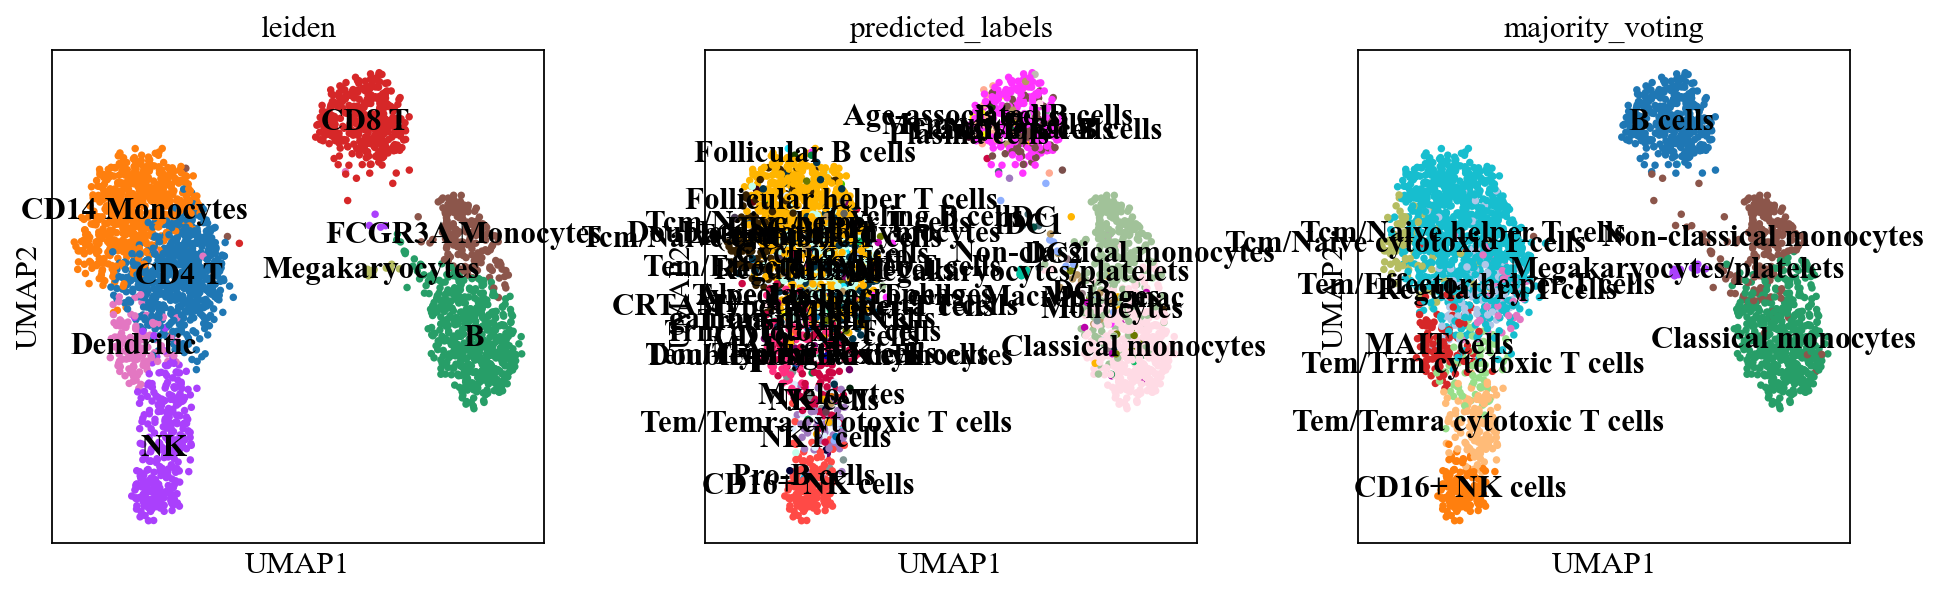

In [52]:
sc.pl.umap(adata, color=['leiden', 'predicted_labels', 'majority_voting'], legend_loc='on data')

使用可视化函数 celltypist.dotplot，它将 CellTypist 预测结果（例如这里的多数投票）与 AnnData 中预定义的细胞类型（这里是 cell_type）进行定量比较。还可以将 use_as_prediction 的值更改为 Predicted_labels 以将原始预测结果与预定义的细胞类型进行比较。

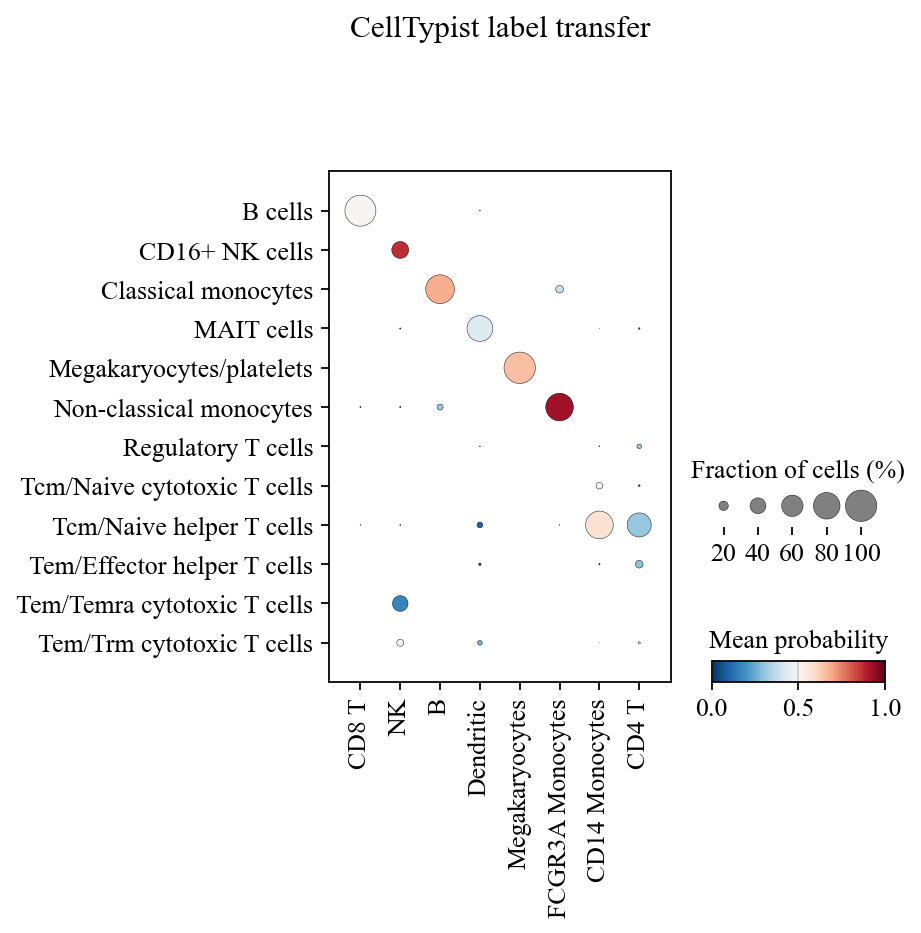

In [53]:
celltypist.dotplot(predictions, use_as_reference = 'leiden', use_as_prediction = 'majority_voting')